# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = The new site design will have the same response rate as the old design

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = The new site design will increase the response rate by at least 1% when compared to the old design

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
effect = .01/.0475
poweranalysis = TTestIndPower()

In [6]:
# Calculate the required sample size
size = poweranalysis.solve_power(alpha=.05, effect_size= effect, power = .8, alternative='larger')
size

279.6667468021971

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

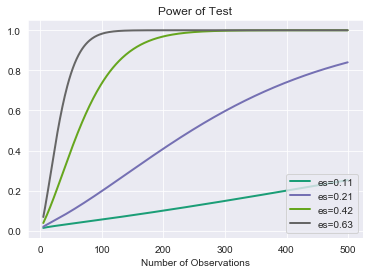

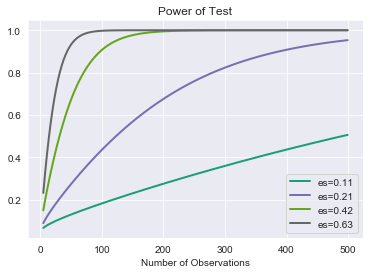

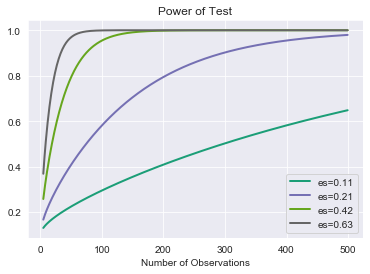

In [8]:
#Your code; plot power curves for the various alpha and effect size combinations
sd = [effect/.0475 for effect in [.005, .01, .02, .03]]
for alpha in [.01, .05, .1]:
    poweranalysis.plot_power(alpha = alpha,
                            effect_size= sd,
                            nobs = np.array(range(5,500)),
                            alternative = 'larger')
        

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
'''
To detect the 1% difference in response rate requested, I would propose a test with around 200 participants.
At that effect size, and an alpha of .1, we would have a 10% chance of a Type 1 error (false postive) and near power of
.8 meaning we'd have an 80% chance of catching the change if there is one. The disadvantage would be that we would still have
a 20% chance of not noticing a significant change but this is outweighed by the advantage of keeping our number of participants
low. I believe a false positive would not have such a negative effect as it would just be saying both site designs are have the 
same response rate, and if wee changed the site design, not much would change. However, if we miss a potential benefit of having
the new design, you may not change even though it would have helped your business.
'''

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.